# Introduction

1. Here I'm running the same code for reproducibility -- I haven't seeded the random number in tensorflow/

In [ ]:
import gym
import time
import numpy as np
import matplotlib.pyplot as plt
from agent import Agent
%matplotlib inline

#Environment
env = gym.make('MountainCarContinuous-v0')
env.seed(1)  # for comparison
num_states = env.observation_space.shape[0]
num_actions = env.action_space.shape[0]

#Agent
gamma, lr, tau = 0.99, 0.0001, 0.001
agent = Agent(num_states, num_actions, lr, gamma)
agent.memory_size = 10**4
agent.batchsize = 256
learning_start = 25*agent.batchsize
agent.tau = tau


#Train
EPISODES = 200
MAX_STEPS = 1000
scores = []
for e in range(1,EPISODES+1):
    state = env.reset()
    reward_sum = 0
    done = False
    steps = 0
    t1 = time.time()
    
    while not done:
        #env.render()
        state = np.reshape(state, [1, num_states])  #reshape for keras
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward_sum += reward
        agent.remember(state[0], action, reward, next_state, done)
        state = next_state
        
        if len(agent.memory) > learning_start:
            agent.train_models()
        
        steps += 1
        if done or steps > MAX_STEPS:
            break
    
    #Learn & print results
    scores.append(reward_sum)
    t2 = time.time()
    if e % 1 == 0:
        print '(episode, score, steps, T (mins)) = ' + str((e,reward_sum, steps, (t2-t1)/60.0))

agent.save_target_weights()
plt.plot(scores)
#np.savetxt('stats/scores_inverted_pendulum.txt',scores)

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
(episode, score, steps, T (mins)) = (1, -5.36918643160537e-06, 999, 0.008631229400634766)
(episode, score, steps, T (mins)) = (2, -5.092128741475025e-06, 999, 0.007711950937906901)
(episode, score, steps, T (mins)) = (3, -5.151861316367306e-06, 999, 0.007897520065307617)
(episode, score, steps, T (mins)) = (4, -5.154930848331264e-06, 999, 0.008453702926635743)
(episode, score, steps, T (mins)) = (5, -5.316677440829765e-06, 999, 0.008418730894724528)
(episode, score, steps, T (mins)) = (6, -5.2923540145883285e-06, 999, 0.008172965049743653)
(episode, score, steps, T (mins)) = (7, -30.90503820135374, 999, 1.2207475503285725)
(episode, score, steps, T (mins)) = (8, -98.84760156956153, 999, 2.0957492152849833)
(episode, score, steps, T (mins)) = (9, -60.470383122851494, 999, 2.0592485825220743)
(e

### Watch a smart agent

In [4]:
done = False
while not done:
    env.render()
    state = np.reshape(state, [1, num_states])  #reshape for keras
    action = agent.act(state)
    next_state, reward, done, _ = env.step(action)
    reward_sum += reward
    agent.remember(state[0], action, reward, next_state, done)
    state = next_state
    if done:
        break
env.close()

### Recreate

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
(episode, score, steps, T (mins)) = (1, -0.009698854113246388, 501, 0.009076380729675293)
(episode, score, steps, T (mins)) = (2, -0.009560244791248092, 501, 0.0048348307609558105)
(episode, score, steps, T (mins)) = (3, -0.009553382187187976, 501, 0.0046650369962056475)
(episode, score, steps, T (mins)) = (4, -0.00955418958281159, 501, 0.005237865447998047)
(episode, score, steps, T (mins)) = (5, -0.009675083894812848, 501, 0.0049497683842976885)
(episode, score, steps, T (mins)) = (6, -0.00959082027875414, 501, 0.004973383744557699)
(episode, score, steps, T (mins)) = (7, -0.00958484278746501, 501, 0.005123368899027507)
(episode, score, steps, T (mins)) = (8, -0.009560410837316947, 501, 0.004794180393218994)
(episode, score, steps, T (mins)) = (9, -0.009626085885595694, 501, 0.00484339793523

(episode, score, steps, T (mins)) = (94, -50.10000000000044, 501, 1.6191664656003317)
(episode, score, steps, T (mins)) = (95, -50.10000000000044, 501, 1.357773764928182)
(episode, score, steps, T (mins)) = (96, -50.10000000000044, 501, 1.4521294315656026)
(episode, score, steps, T (mins)) = (97, -49.38269302025451, 501, 1.6589107990264893)
(episode, score, steps, T (mins)) = (98, -45.04959462234336, 501, 1.61695556640625)
(episode, score, steps, T (mins)) = (99, -50.10000000000044, 501, 1.6851088682810464)
(episode, score, steps, T (mins)) = (100, -50.10000000000044, 501, 1.482152783870697)


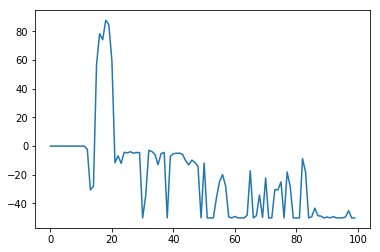

In [14]:
import gym
import time
import numpy as np
import matplotlib.pyplot as plt
from agent import Agent
%matplotlib inline

#Environment
env = gym.make('MountainCarContinuous-v0')
env.seed(1)  # for comparison
num_states = env.observation_space.shape[0]
num_actions = env.action_space.shape[0]

#Agent
lr,gamma = 0.001, 0.999
agent = Agent(num_states, num_actions, lr, gamma)
agent.memory_size = 10**4
agent.batchsize = 256
learning_start = 25*agent.batchsize
agent.tau = 0.1


#Train
EPISODES = 100
MAX_STEPS = 500
scores = []
for e in range(1,EPISODES+1):
    state = env.reset()
    reward_sum = 0
    done = False
    steps = 0
    t1 = time.time()
    
    while not done:
        #env.render()
        state = np.reshape(state, [1, num_states])  #reshape for keras
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward_sum += reward
        agent.remember(state[0], action, reward, next_state, done)
        state = next_state
        
        if len(agent.memory) > learning_start:
            agent.train_models()
        
        steps += 1
        if done or steps > MAX_STEPS:
            break
    
    #Learn & print results
    scores.append(reward_sum)
    t2 = time.time()
    if e % 1 == 0:
        print '(episode, score, steps, T (mins)) = ' + str((e,reward_sum, steps, (t2-t1)/60.0))

plt.plot(scores)
#np.savetxt('stats/scores_inverted_pendulum.txt',scores)

Ok, so there is something here. It does at least win a few times. I just need to weight the positive experiences more, somehow. Ok, good. But I believe I've reduced the problem to hyperparameter searching. So I should move onto the MADDPG.